In [1]:
mp_root = '/media/lsky/HDD/MP'

In [2]:
images_root = '../img/'

In [64]:
import os
import numpy as np
import torch
from scipy import stats

In [4]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [5]:
full_index = np.load(os.path.join(mp_root, 'index.npy'))
index_connected = np.load(os.path.join(mp_root, 'meta_derived', 'index_connected_5.0.npy'))

band_gap = torch.load(os.path.join(mp_root, 'base_properties', 'band_gap.pth'))
formation_energy = torch.load(os.path.join(mp_root, 'base_properties', 'formation_energy_per_atom.pth'))

In [19]:
is_hubbard = np.load(os.path.join(mp_root, 'meta', 'is_hubbard.npy'))

In [6]:
i = 0
j = 0
idx_in_full = []
while i < len(full_index) and j < len(index_connected):
    if index_connected[j] == full_index[i]:
        idx_in_full.append(i)
        i += 1
        j += 1
    else:
        i += 1

idx_in_full = np.array(idx_in_full)

In [7]:
band_gap_subset = band_gap[idx_in_full]

In [66]:
band_gap_subset_nonzero = band_gap_subset[band_gap_subset > 0]
band_gap_subset_nonzero_sqrt = np.sqrt(band_gap_subset_nonzero)
band_gap_subset_nonzero_sqrt_normalized = (band_gap_subset_nonzero_sqrt - band_gap_subset_nonzero_sqrt.mean()) / band_gap_subset_nonzero_sqrt.std()
print(f"mean: {band_gap_subset_nonzero_sqrt.mean():.3f}; std: {band_gap_subset_nonzero_sqrt.std():.3f}")
print(f"skew: {stats.skew(band_gap_subset_nonzero_sqrt):.3f}; kurtosis: {stats.kurtosis(band_gap_subset_nonzero_sqrt):.3f}")

mean: 1.274; std: 0.612
skew: -0.097; kurtosis: -0.802


In [79]:
(band_gap_subset == 0).sum()*100./len(band_gap_subset)

tensor(45.2913)

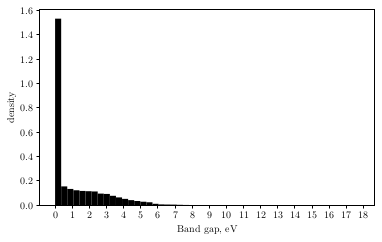

In [84]:
plt.figure(figsize=(6, 3.6))
plt.hist(band_gap_subset, bins=50, density=True, color="black")
plt.ylabel('density')
plt.xlabel('Band gap, eV')
plt.xticks(np.arange(18+1))
plt.savefig(f'{images_root}/band_gap.pgf');

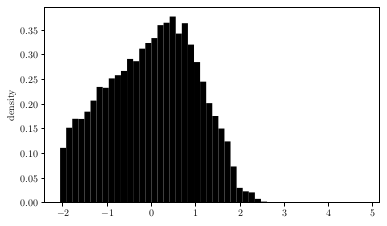

In [83]:
plt.figure(figsize=(6, 3.6))
plt.hist(band_gap_subset_nonzero_sqrt_normalized, bins=50, density=True, color="black")
plt.ylabel('density')
plt.savefig(f'{images_root}/band_gap_sqrt_standard.pgf');

In [20]:
formation_energy_subset = formation_energy[idx_in_full]
is_hubbard_subset = is_hubbard[idx_in_full]

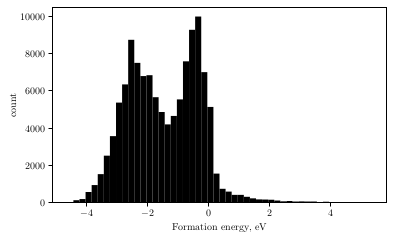

In [70]:
plt.figure(figsize=(6, 3.6))
plt.ylabel("count")
plt.xlabel("Formation energy, eV")
plt.hist(formation_energy_subset, bins=50, color="black")
plt.savefig(f'{images_root}/formation_energy.pgf');

In [67]:
formation_energy_subset.mean(), formation_energy_subset.std()

(tensor(-1.4330, dtype=torch.float64), tensor(1.2052, dtype=torch.float64))

In [71]:
formation_energy_subset_standard = (formation_energy_subset - formation_energy_subset.mean()) / formation_energy_subset.std() 

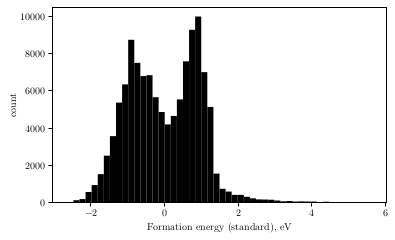

In [73]:
plt.figure(figsize=(6, 3.6))
plt.ylabel("count")
plt.xlabel("Formation energy (standard), eV")
plt.hist(formation_energy_subset_standard, bins=50, color="black");
#plt.savefig(f'{images_root}/formation_energy.pgf');

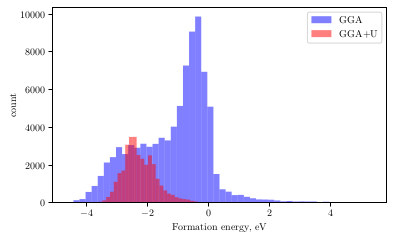

In [86]:
plt.figure(figsize=(6, 3.6))
plt.ylabel("count")
plt.xlabel("Formation energy, eV")
plt.hist(formation_energy_subset[np.logical_not(is_hubbard_subset)], bins=50, color="blue", alpha=0.5, label='GGA')
plt.hist(formation_energy_subset[is_hubbard_subset], bins=50, color="red", alpha=0.5, label='GGA+U');
plt.legend()
plt.savefig(f'{images_root}/formation_energy_grouped.pgf');

In [87]:
n_atoms = np.load(os.path.join(mp_root, 'derived_radial_cutoff_5.0', 'n_atoms.npy'))

In [92]:
formation_energy_subset_2n1 = formation_energy_subset[(n_atoms+1)%2 == 0]
formation_energy_subset_4n = formation_energy_subset[n_atoms%4 == 0]
formation_energy_subset_4n2 = formation_energy_subset[(n_atoms+2)%4 == 0]

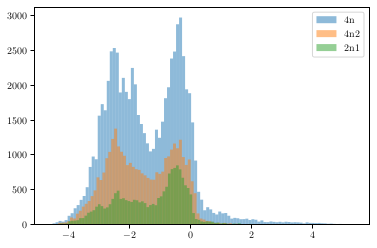

In [96]:
plt.hist(formation_energy_subset_4n, bins=100, alpha=0.5, label='4n')
plt.hist(formation_energy_subset_4n2, bins=100, alpha=0.5, label='4n2')
plt.hist(formation_energy_subset_2n1, bins=100, alpha=0.5, label='2n1')
plt.legend();

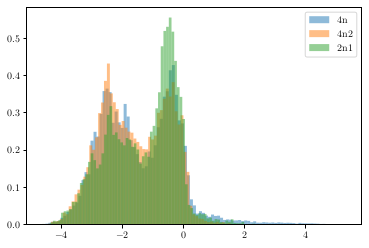

In [100]:
plt.hist(formation_energy_subset_4n, bins=100, alpha=0.5, density=True, label='4n')
plt.hist(formation_energy_subset_4n2, bins=100, alpha=0.5, density=True, label='4n2')
plt.hist(formation_energy_subset_2n1, bins=100, alpha=0.5, density=True, label='2n1')
plt.legend();

In [99]:
print(formation_energy_subset_4n.mean())
print(formation_energy_subset_4n2.mean())
print(formation_energy_subset_2n1.mean())

tensor(-1.3956, dtype=torch.float64)
tensor(-1.5652, dtype=torch.float64)
tensor(-1.3328, dtype=torch.float64)
